In [63]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [64]:
tickers = ["AAPL", "MSFT", "GOOG"]

df = yf.download(tickers, period="1y")

# Flatten MultiIndex columns
df.columns = ['_'.join(col).strip() for col in df.columns]

df.head()


/var/folders/jw/n4rjlkjd76z6zgdh5wl80j940000gn/T/ipykernel_84023/3673289913.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, period="1y")
[*********************100%***********************]  3 of 3 completed


,Close_AAPL,Close_GOOG,Close_MSFT,High_AAPL,High_GOOG,High_MSFT,Low_AAPL,Low_GOOG,Low_MSFT,Open_AAPL,Open_GOOG,Open_MSFT,Volume_AAPL,Volume_GOOG,Volume_MSFT
Date,,,,,,,,,,,,,,,
2024-11-20,227.968948,176.557266,412.393921,228.894754,178.329508,414.180526,224.872950,174.565981,407.520505,227.033178,178.050730,413.763643,35169600,15729800,19191700
2024-11-21,227.491119,168.502518,410.613708,229.123735,174.814887,417.485950,224.693774,164.589635,408.047821,227.849499,174.690431,417.207481,42108300,38839400,20780200
2024-11-22,228.835037,165.844177,414.721161,229.681216,167.531783,415.118969,227.033189,164.987924,408.813620,227.033189,166.431603,409.121923,38168300,24497000,24814600
2024-11-25,231.821533,168.691681,416.501373,232.199827,169.717207,418.778837,228.705636,166.670528,412.582902,230.417893,167.257969,416.093610,90152800,21395700,27691100
2024-11-26,234.001663,169.876495,425.651093,234.509377,170.747682,426.695373,232.279457,168.691679,416.561057,232.279457,168.751430,417.297003,45986200,14937500,23458900


In [65]:
numeric_cols = df.select_dtypes(include=np.number).columns

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numeric_cols]),
    columns=numeric_cols,
    index=df.index
)

df_scaled.head()


,Close_AAPL,Close_GOOG,Close_MSFT,High_AAPL,High_GOOG,High_MSFT,Low_AAPL,Low_GOOG,Low_MSFT,Open_AAPL,Open_GOOG,Open_MSFT,Volume_AAPL,Volume_GOOG,Volume_MSFT
Date,,,,,,,,,,,,,,,
2024-11-20,0.542814,0.206411,0.312940,0.448756,0.179704,0.266384,0.543605,0.221309,0.324213,0.528382,0.234644,0.313215,0.074056,0.124027,0.210637
2024-11-21,0.538194,0.151511,0.303508,0.451378,0.156808,0.283661,0.541873,0.152751,0.326887,0.536130,0.212091,0.330042,0.117110,0.445350,0.238457
2024-11-22,0.551189,0.133392,0.325270,0.457759,0.109363,0.271289,0.564486,0.155488,0.330771,0.528382,0.156661,0.290534,0.092663,0.245929,0.309113
2024-11-25,0.580067,0.152801,0.334702,0.486589,0.123600,0.290418,0.580652,0.167051,0.349887,0.560508,0.162207,0.324599,0.415225,0.202807,0.359490
2024-11-26,0.601148,0.160876,0.383180,0.513026,0.130313,0.331796,0.615196,0.180940,0.370063,0.578177,0.172230,0.330480,0.141172,0.113010,0.285370


In [66]:
returns = df[numeric_cols].pct_change().dropna()
risk_scores = returns.std().sort_values(ascending=False)
risk_scores


Volume_GOOG    0.560089
Volume_AAPL    0.400873
Volume_MSFT    0.382943
Open_GOOG      0.021633
Open_AAPL      0.021575
Close_AAPL     0.020577
Close_GOOG     0.020510
Low_GOOG       0.019736
High_GOOG      0.019165
Low_AAPL       0.018387
High_AAPL      0.016957
Open_MSFT      0.016954
Close_MSFT     0.015357
Low_MSFT       0.014680
High_MSFT      0.014462
dtype: float64

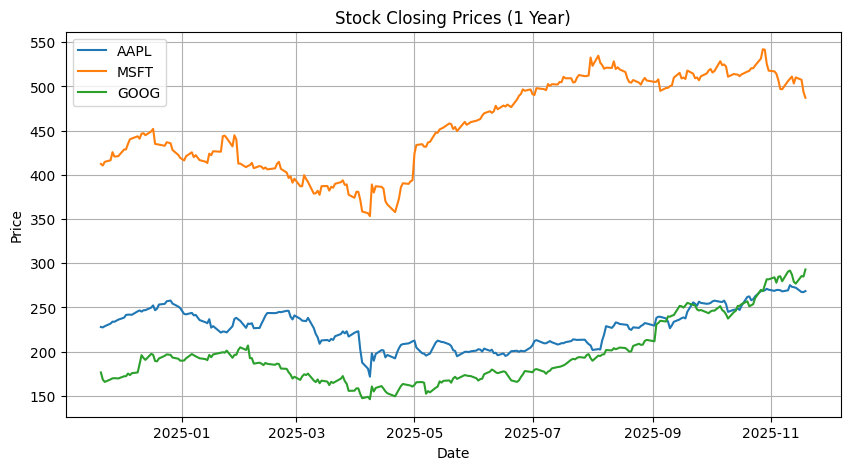

In [67]:
plt.figure(figsize=(10,5))
for t in tickers:
    plt.plot(df.index, df[f"Close_{t}"], label=t)

plt.title("Stock Closing Prices (1 Year)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


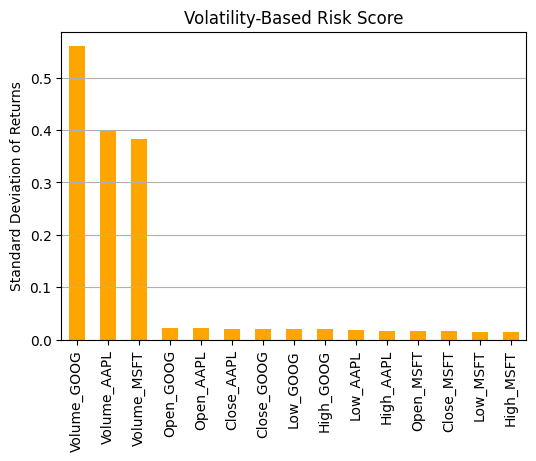

In [68]:
plt.figure(figsize=(6,4))
risk_scores.plot(kind="bar", color="orange")

plt.title("Volatility-Based Risk Score")
plt.ylabel("Standard Deviation of Returns")
plt.grid(axis="y")
plt.show()
